<a href="https://colab.research.google.com/github/AnanyaKodali/MAT-494/blob/main/1_4_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.4: Principal Component Analysis**

### 1.4.1. Singular value decomposition

#### Theory:
Singular Value Decomposition (SVD) is a method of decomposing a matrix into three distinct components. It generalizes the eigendecomposition of square matrices to any 𝑚×𝑛 matrix. The decomposition is given by:

𝐴=𝑈Σ𝑉𝑇

*   𝐴: Original matrix (of size 𝑚×𝑛).
*   𝑈: Orthogonal matrix of size 𝑚×𝑚 (left singular vectors).
*   Σ: Diagonal matrix of size 𝑚×𝑛 containing singular values.
*   𝑉𝑇: Orthogonal matrix of size 𝑛×𝑛 (right singular vectors).

#### Mathematical Intuition:
Given an 𝑚×𝑛 matrix 𝐴, the SVD of 𝐴 is a factorization such that:

𝐴=𝑈Σ𝑉𝑇


* *Left Singular Vectors (𝑈)*: Columns of 𝑈 are eigenvectors of (𝐴𝐴)^𝑇
* *Right Singular Vectors (𝑉)*: Columns of 𝑉 are eigenvectors of (𝐴^𝑇)𝐴
* *Singular Values (Σ)*: Square roots of non-zero eigenvalues of (𝐴^𝑇)𝐴


In [4]:
import numpy as np

# Create a sample matrix
A = np.array([[74, 25, 36, 97, 57],
              [40, 52, 79, 98, 50],
              [17, 97, 91, 23, 50],
              [95, 91, 88, 1, 80]])

# Perform SVD
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Display results
print("Matrix A:\n", A)
print("\nMatrix U (Left Singular Vectors):\n", U)
print("\nSingular Values (Diagonal of Σ):\n", S)
print("\nMatrix V^T (Right Singular Vectors Transpose):\n", Vt)


Matrix A:
 [[74 25 36 97 57]
 [40 52 79 98 50]
 [17 97 91 23 50]
 [95 91 88  1 80]]

Matrix U (Left Singular Vectors):
 [[ 0.43194378  0.63905299 -0.34897406 -0.53221514]
 [ 0.50059734  0.41705957  0.42346769  0.62939553]
 [ 0.46969047 -0.41054603  0.59765187 -0.5036418 ]
 [ 0.5849938  -0.49912378 -0.58455493  0.25875324]]

Singular Values (Diagonal of Σ):
 [280.89106468 107.89351237  67.19530951  10.34360446]

Matrix V^T (Right Singular Vectors Transpose):
 [[ 0.41135834  0.48283511  0.53158847  0.36435819  0.42697937]
 [ 0.0887566  -0.44098858 -0.23475896  0.86120373 -0.02945687]
 [-0.80746722  0.26897266  0.35473261  0.30970596 -0.23215814]
 [ 0.17513706 -0.56880755  0.7252195  -0.12269557 -0.32370891]]


#### Visualization:
1.   *Visualizing the Original Matrix:* Create a heatmap of the original matrix 𝐴.
2. *Visualizing 𝑈, Σ, and 𝑉𝑇:* Display the individual components.
3. *Reconstruction*: Reconstruct matrix 𝐴 from its SVD components and visualize the difference.




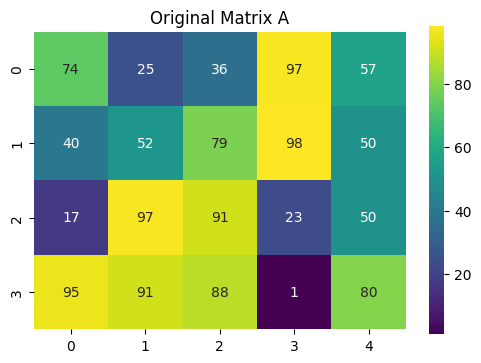

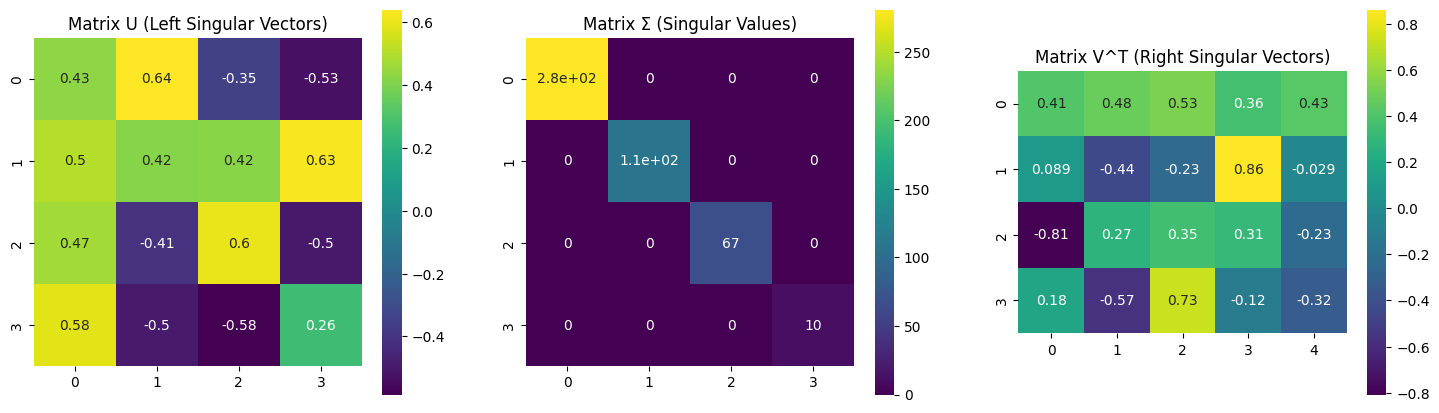

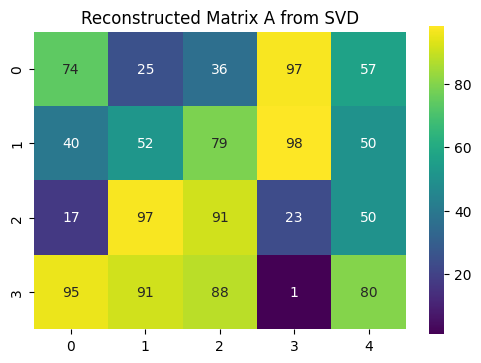

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Using sample matrix from above
A = np.array([[74, 25, 36, 97, 57],
              [40, 52, 79, 98, 50],
              [17, 97, 91, 23, 50],
              [95, 91, 88, 1, 80]])

# Perform SVD
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Plot the original matrix A
plt.figure(figsize=(6, 4))
sns.heatmap(A, annot=True, cmap="viridis", cbar=True, square=True)
plt.title("Original Matrix A")
plt.show()

# Plot U, Sigma, and V^T matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# U Matrix
sns.heatmap(U, annot=True, cmap="viridis", cbar=True, square=True, ax=ax[0])
ax[0].set_title("Matrix U (Left Singular Vectors)")

# Sigma Matrix
sigma_matrix = np.zeros((U.shape[1], Vt.shape[0]))
np.fill_diagonal(sigma_matrix, S)
sns.heatmap(sigma_matrix, annot=True, cmap="viridis", cbar=True, square=True, ax=ax[1])
ax[1].set_title("Matrix Σ (Singular Values)")

# V Transposed Matrix
sns.heatmap(Vt, annot=True, cmap="viridis", cbar=True, square=True, ax=ax[2])
ax[2].set_title("Matrix V^T (Right Singular Vectors)")

plt.show()

# Reconstruct the matrix A using SVD components
Sigma_full = np.zeros((U.shape[0], Vt.shape[0]))
np.fill_diagonal(Sigma_full, S)

# Reconstruct A
A_reconstructed = U @ Sigma_full @ Vt

# Plot reconstructed matrix
plt.figure(figsize=(6, 4))
sns.heatmap(A_reconstructed, annot=True, cmap="viridis", cbar=True, square=True)
plt.title("Reconstructed Matrix A from SVD")
plt.show()


### 1.4.2. Low-Rank Matrix Approximation

#### Theory:
Low-Rank Matrix Approximation reduces the complexity of a matrix while retaining most of its essential features.

It approximates a matrix 𝐴 by using only the top 𝑘 singular values and corresponding singular vectors.

This is especially useful for:
*   Data Compression: Retain important features while reducing storage.
*   Noise Reduction: Discard smaller singular values that may correspond to noise.


#### Mathematatical Intuition:
Given the SVD of a matrix 𝐴: $𝐴 = 𝑈Σ𝑉^𝑇$

We can construct a rank-𝑘 approximation of 𝐴 by retaining only the top  𝑘 singular values and corresponding singular vectors:

$𝐴_k = 𝑈_𝑘Σ_𝑘𝑉_𝑘^ 𝑇$ where:


*   $𝑈_𝑘$  is the first 𝑘 columns of 𝑈
*   $Σ_𝑘$  is a 𝑘×𝑘 diagonal matrix with the top 𝑘 singular values
* $𝑉_𝑘^𝑇$ is the first 𝑘 rows of 𝑉𝑇

In [8]:
from google.colab import files

# Upload an image file
uploaded = files.upload()

Saving city.jpg to city.jpg


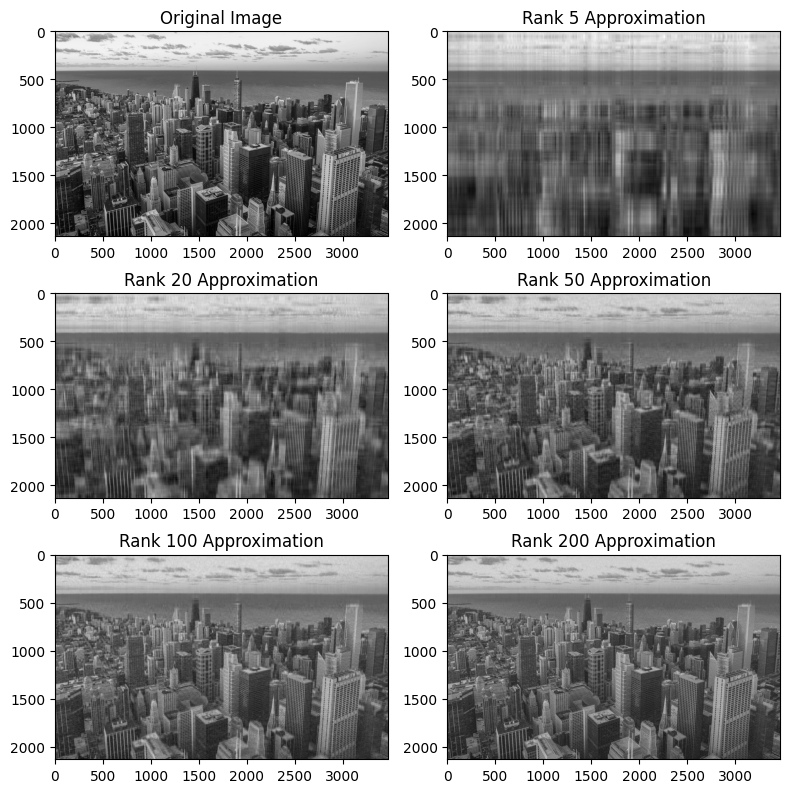

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and convert image to grayscale
image_path = 'city.jpg'

# Ensure the file path is correct and load the image
try:
    city = Image.open(image_path).convert("L")
except FileNotFoundError:
    print("Image file not found. Please check the image path.")

# Convert the image to a NumPy array
image_array = np.array(city)

# Perform SVD on the image matrix
U_img, S_img, Vt_img = np.linalg.svd(image_array, full_matrices=False)

# Function to compress image using top k singular values
def compress_image(U, S, Vt, k):
    """Reconstruct image using top k singular values."""
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]
    compressed_img = U_k @ S_k @ Vt_k
    return compressed_img

# Display original and compressed images for various ranks
plt.figure(figsize=(8, 8))

# Plot original image
plt.subplot(3, 2, 1)
plt.imshow(image_array, cmap="gray")
plt.title("Original Image")

# Plot compressed images with different ranks
for i, k in enumerate([5, 20, 50, 100, 200], start=2):
    compressed_img = compress_image(U_img, S_img, Vt_img, k)
    plt.subplot(3, 2, i)
    plt.imshow(compressed_img, cmap="gray")
    plt.title(f"Rank {k} Approximation")

plt.tight_layout()
plt.show()


### 1.4.3. Principal Component Analysis (PCA)

#### Theory:
Principal Component Analysis (PCA) is a technique used for dimensionality reduction. It identifies the directions (principal components) in which the variance of data is maximal, and projects the data onto these components. This reduces the number of features while retaining most of the variance.


#### Mathematical Intuition:
1. *Standardize the Data*: Ensure each feature has equal weight.
2. *Compute the Covariance Matrix*: Understand the relationship between features.
3. *Compute Eigenvectors and Eigenvalues*: Find the directions and magnitude of variance.
4. *Project the Data*: Transform data onto the new principal component axes.

In [12]:
# Import necessary libraries
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data  # Features
y = wine.target  # Target
feature_names = wine.feature_names
target_names = wine.target_names

# Convert to a DataFrame for better visualization
wine_df = pd.DataFrame(X, columns=feature_names)
wine_df['Target'] = y

# Display the first few rows of the dataset
print("First few rows of the Wine dataset:")
display(wine_df.head())

First few rows of the Wine dataset:


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

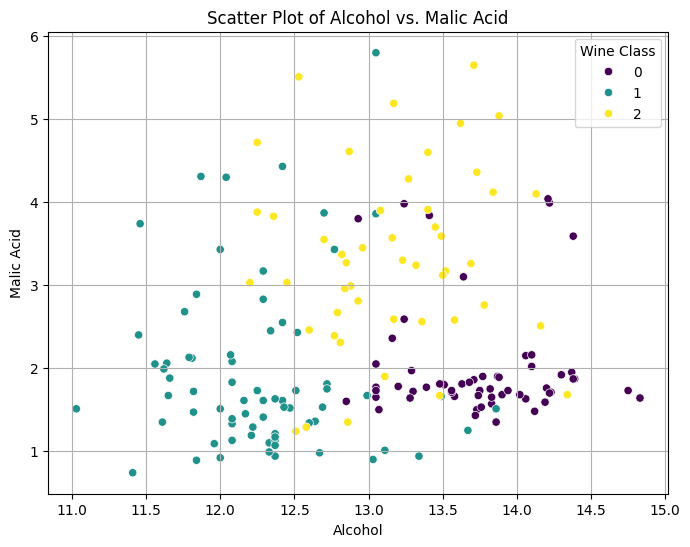

In [13]:
# Step 1: Scatter plot of the original features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=wine_df['alcohol'], y=wine_df['malic_acid'], hue=wine_df['Target'], palette='viridis')
plt.title('Scatter Plot of Alcohol vs. Malic Acid')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(title='Wine Class')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

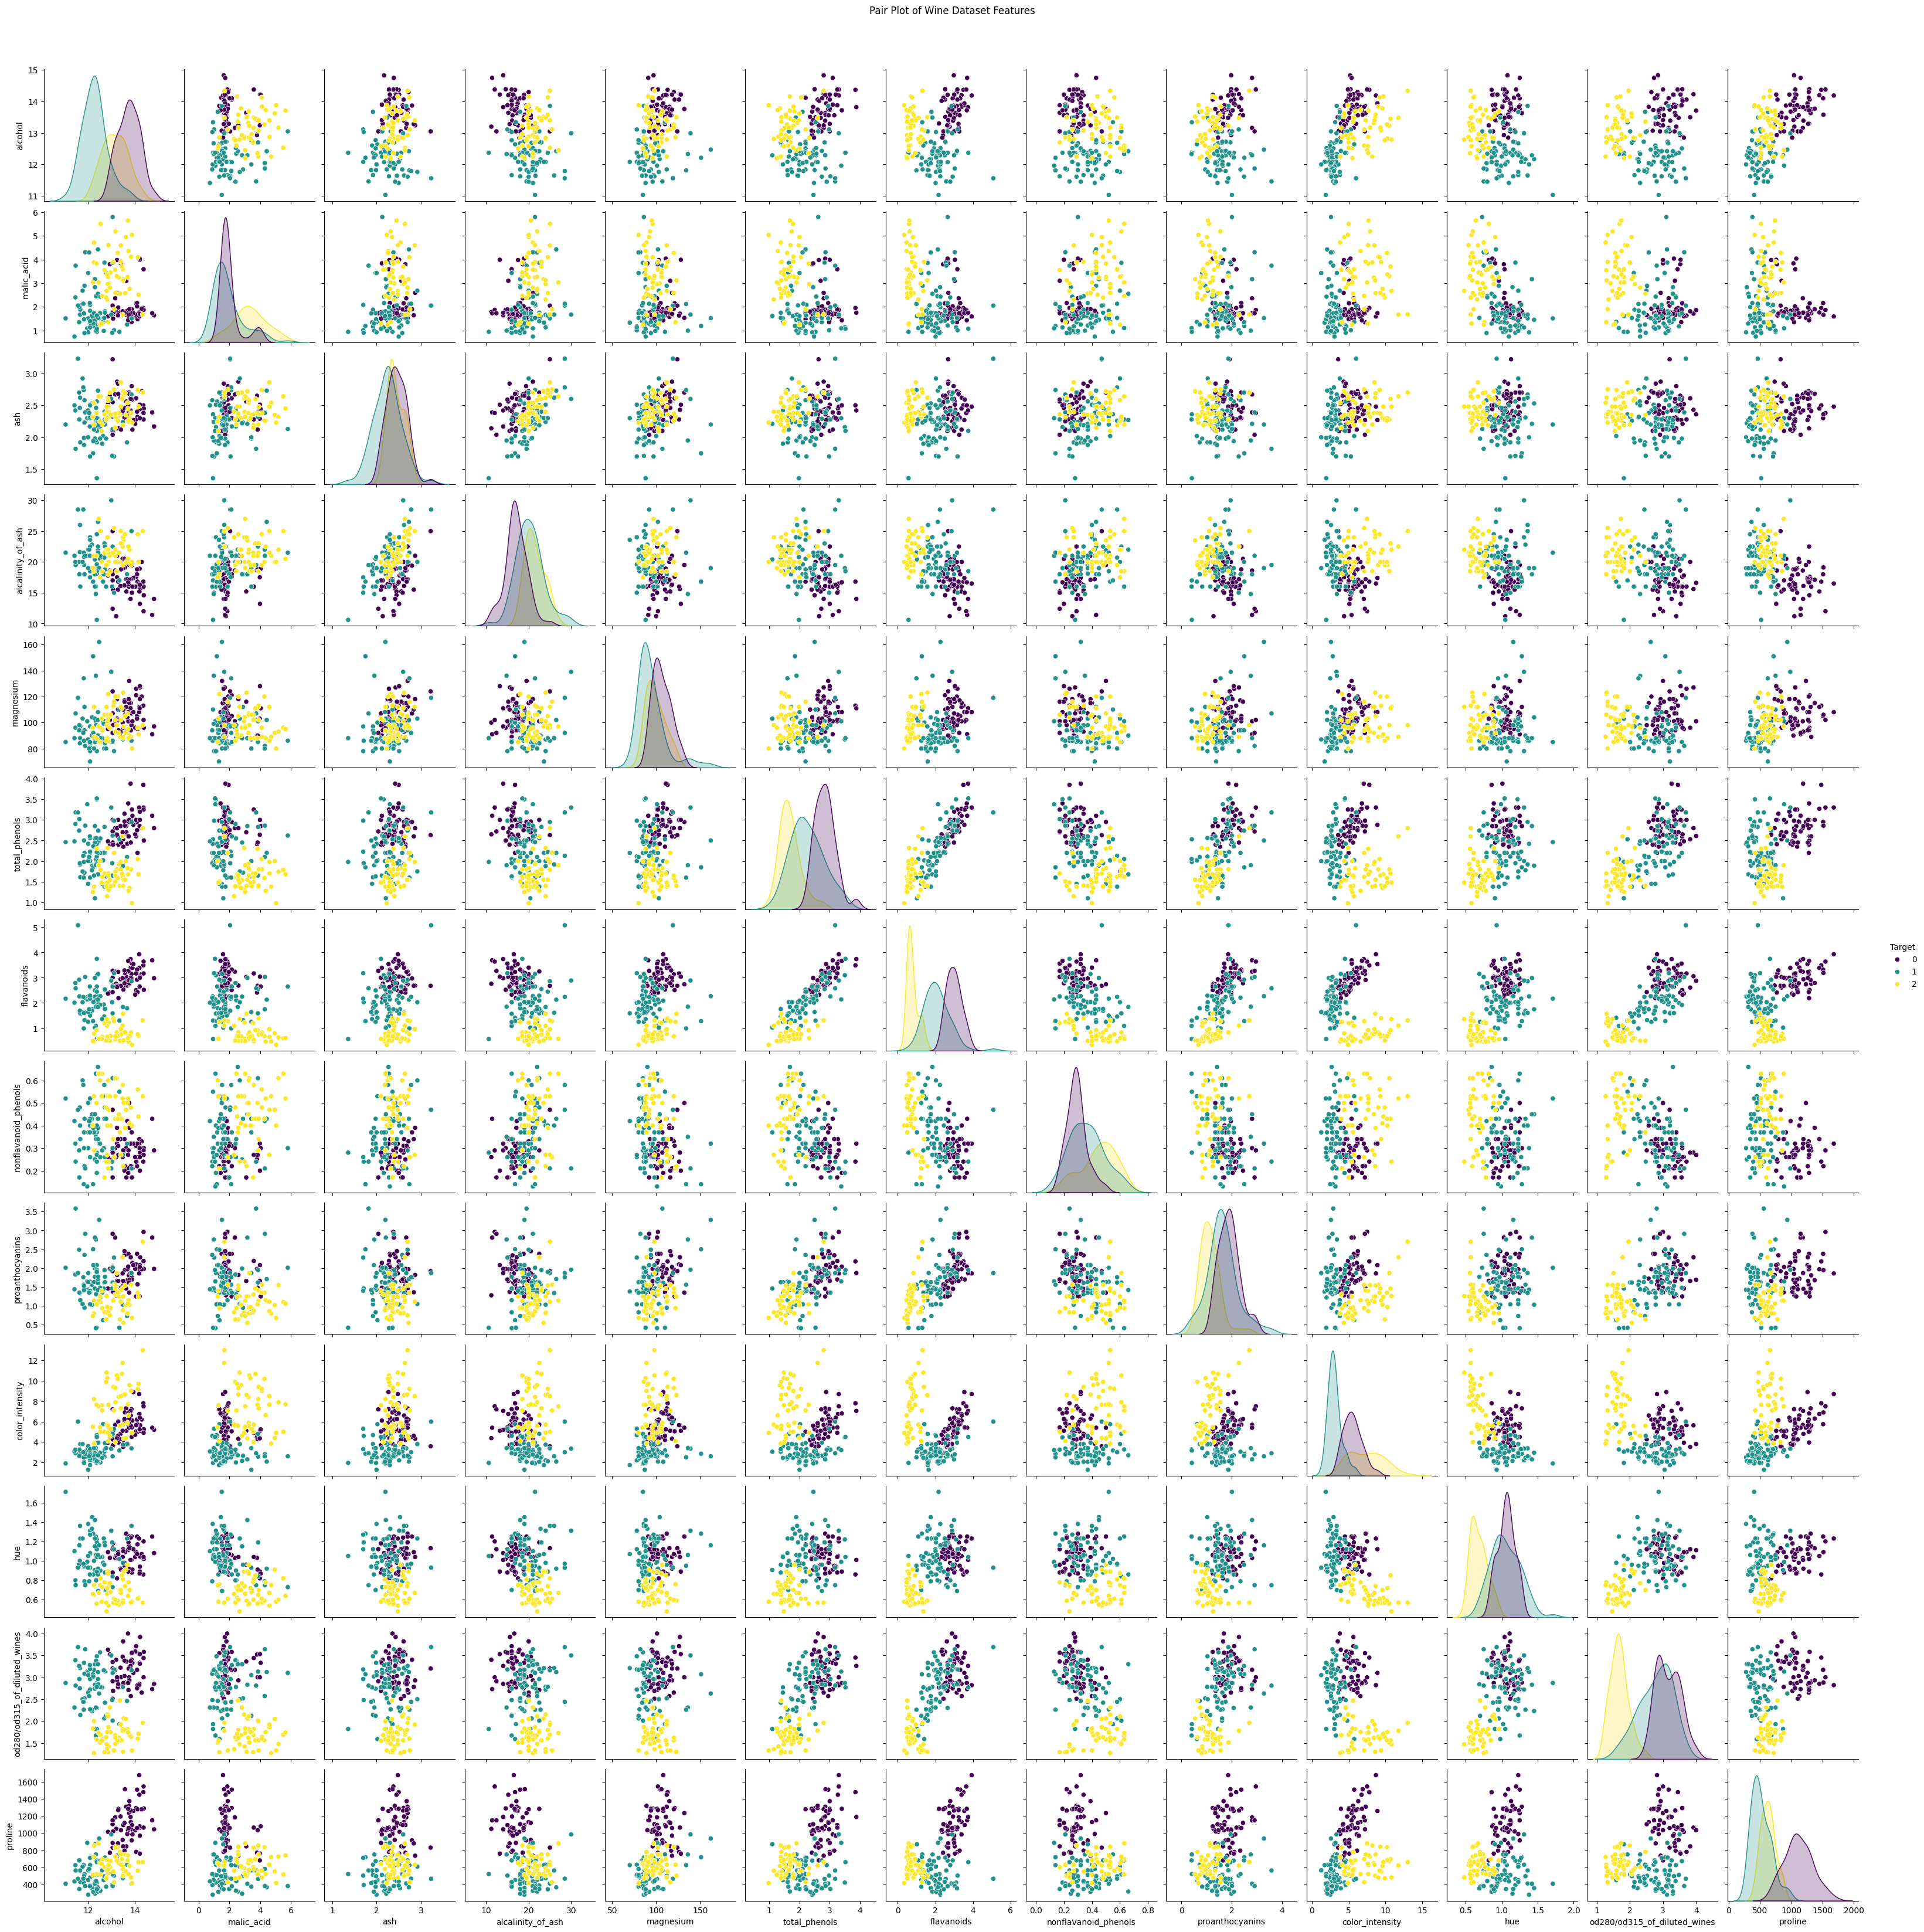

In [14]:
# Step 2: Pairplot of the Original Dataset (Pairwise relationships)
sns.pairplot(wine_df, hue='Target', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Wine Dataset Features', y=1.02)
plt.show()

# Standardize the features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

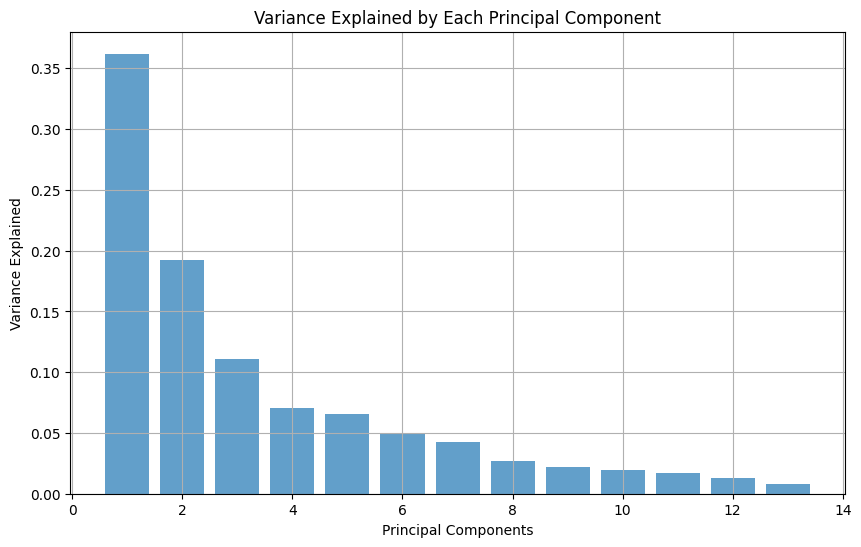

In [15]:
# Step 3: Perform PCA with all components to analyze explained variance
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 4: Explained variance ratio plot
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.grid(True)
plt.show()

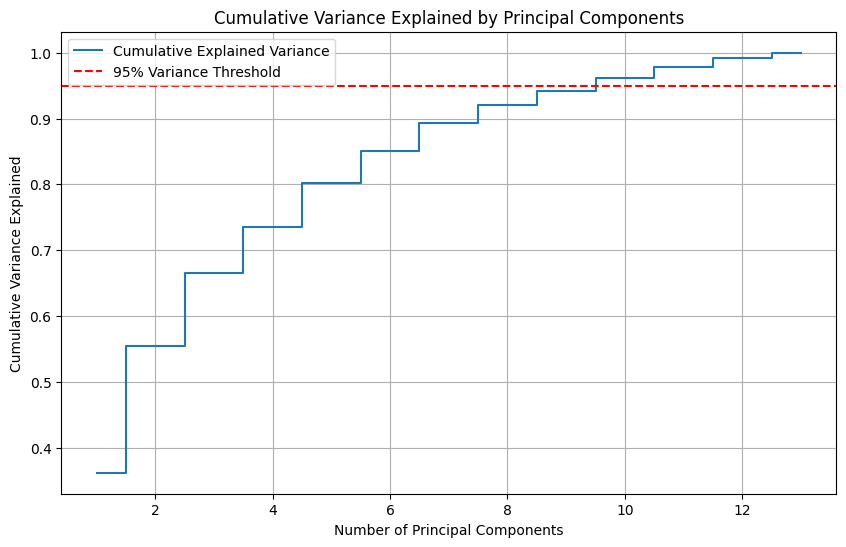

In [16]:
# Step 5: Cumulative explained variance plot
cumulative_variance = explained_variance.cumsum()
plt.figure(figsize=(10, 6))
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance')
plt.axhline(0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.legend()
plt.grid(True)
plt.show()

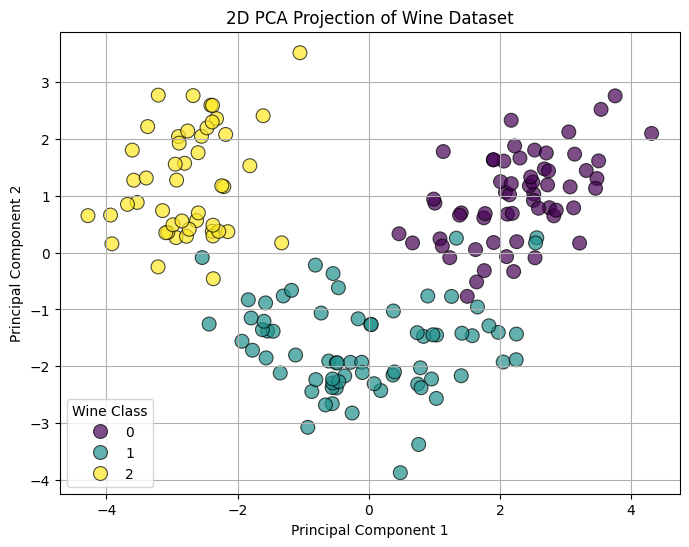

In [17]:
# Step 6: Perform PCA with 2 components for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Plot the 2D PCA projection
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='viridis', s=100, edgecolor='k', alpha=0.7)
plt.title('2D PCA Projection of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Wine Class')
plt.grid(True)
plt.show()

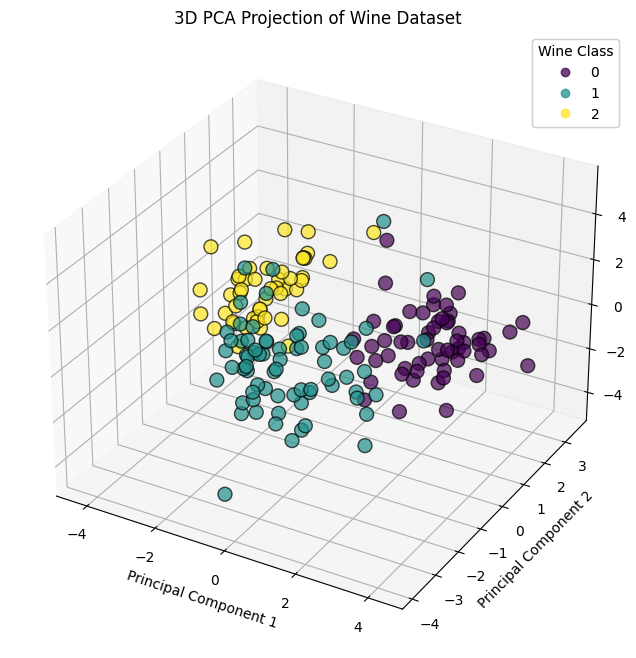

In [18]:
# Step 7: Perform PCA with 3 components for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 3D plot setup
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', s=100, alpha=0.7, edgecolor='k')
legend1 = ax.legend(*scatter.legend_elements(), title="Wine Class", loc="upper right")
ax.add_artist(legend1)
ax.set_title('3D PCA Projection of Wine Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()